In [1]:
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, C: float, gamma0: float, a: float, max_epochs: int = 100):
        """
        Initialize SVM with stochastic sub-gradient descent.
        
        Args:
            C: Regularization parameter
            gamma0: Initial learning rate
            a: Learning rate schedule parameter
            max_epochs: Maximum number of epochs
        """
        self.C = C
        self.gamma0 = gamma0
        self.a = a
        self.max_epochs = max_epochs
        self.w = None
        self.b = 0
        self.objective_history = []
        
    def _learning_rate(self, t: int) -> float:
        """Calculate learning rate at step t using schedule γₜ = γ₀/(1 + (γ₀/a)t)"""
        return self.gamma0 / (1 + (self.gamma0 / self.a) * t)
    
    def _calculate_objective(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate the SVM objective function value"""
        # Regularization term
        reg_term = 0.5 * np.sum(self.w ** 2)
        
        # Hinge loss term
        margins = y * (X.dot(self.w) + self.b)
        hinge_losses = np.maximum(0, 1 - margins)
        hinge_term = self.C * np.sum(hinge_losses)
        
        return reg_term + hinge_term
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Train the SVM using stochastic sub-gradient descent.
        
        Args:
            X: Training features (n_samples, n_features)
            y: Training labels {-1, 1} (n_samples,)
        """
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        t = 0  # Step counter
        
        for epoch in range(self.max_epochs):
            # Shuffle the training data
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            for i in range(n_samples):
                t += 1
                gamma_t = self._learning_rate(t)
                
                # Calculate margin for current example
                margin = y_shuffled[i] * (X_shuffled[i].dot(self.w) + self.b)
                
                # Update weights and bias if margin < 1
                if margin < 1:
                    self.w = (1 - gamma_t) * self.w + gamma_t * self.C * y_shuffled[i] * X_shuffled[i]
                    self.b += gamma_t * self.C * y_shuffled[i]
                else:
                    self.w = (1 - gamma_t) * self.w
            
            # Record objective value after each epoch
            obj_value = self._calculate_objective(X, y)
            self.objective_history.append(obj_value)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Make predictions for test data.
        
        Args:
            X: Test features (n_samples, n_features)
            
        Returns:
            Predicted labels {-1, 1} (n_samples,)
        """
        return np.sign(X.dot(self.w) + self.b)
    
    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate accuracy score.
        
        Args:
            X: Test features
            y: True labels
            
        Returns:
            Accuracy score
        """
        return np.mean(self.predict(X) == y)

def load_and_preprocess_data(train_path: str, test_path: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Load and preprocess the banknote data.
    
    Args:
        train_path: Path to training data CSV
        test_path: Path to test data CSV
        
    Returns:
        X_train, y_train, X_test, y_test
    """
    # Load data
    train_data = np.loadtxt(train_path, delimiter=',')
    test_data = np.loadtxt(test_path, delimiter=',')
    
    # Split into features and labels
    X_train, y_train = train_data[:, :-1], train_data[:, -1]
    X_test, y_test = test_data[:, :-1], test_data[:, -1]
    
    # Convert labels to {-1, 1}
    y_train = 2 * y_train - 1
    y_test = 2 * y_test - 1
    
    return X_train, y_train, X_test, y_test

def plot_objective_history(objective_history: list, title: str = "Objective Function History"):
    """Plot the objective function value over epochs."""
    plt.figure(figsize=(10, 6))
    plt.plot(objective_history)
    plt.xlabel('Epoch')
    plt.ylabel('Objective Value')
    plt.title(title)
    plt.grid(True)
    plt.show()



Training SVM with C=0.1145
Training error: 0.1055
Test error: 0.1220


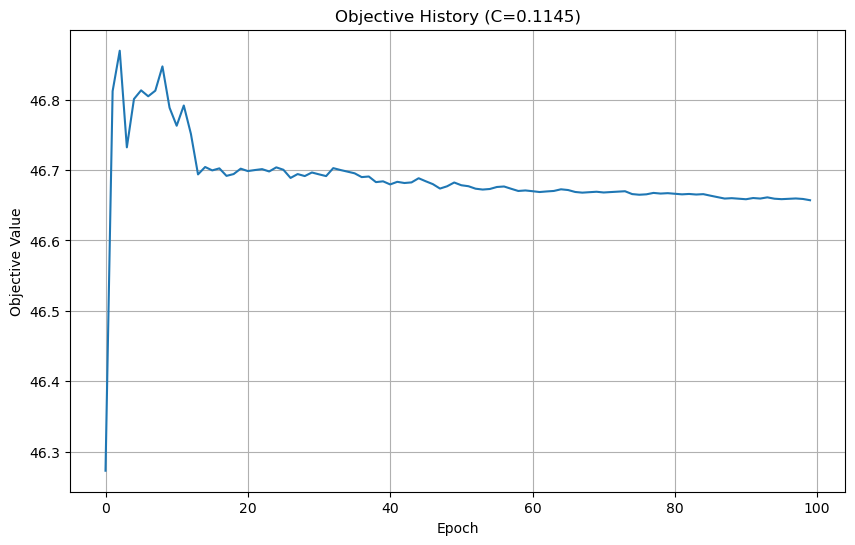


Training SVM with C=0.5727
Training error: 0.0287
Test error: 0.0200


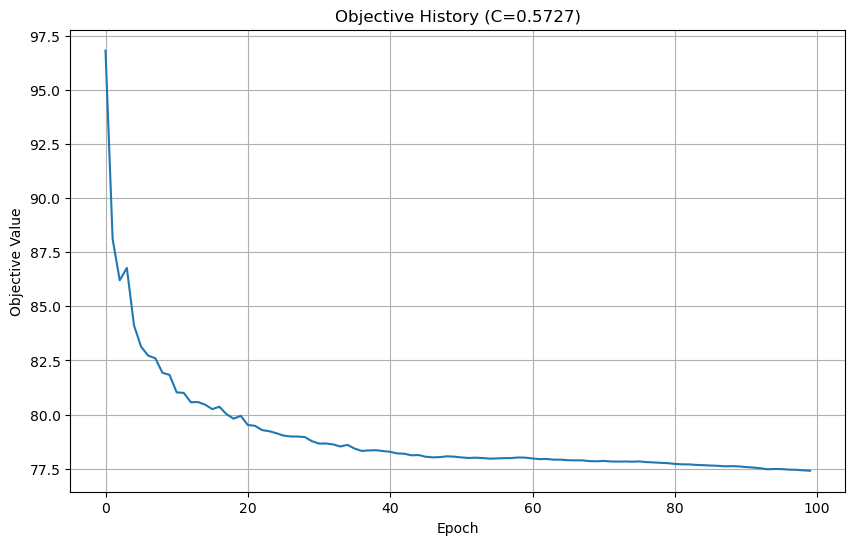


Training SVM with C=0.8018
Training error: 0.0264
Test error: 0.0200


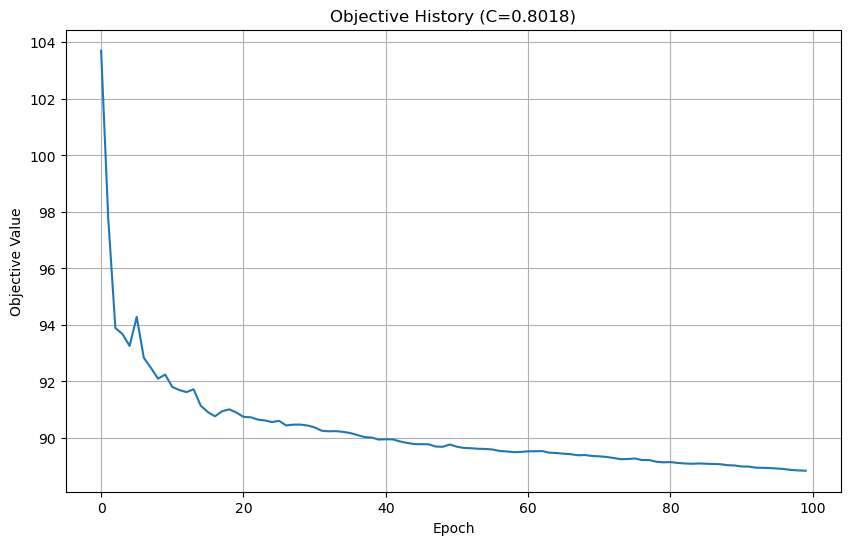

In [2]:

# Example usage
if __name__ == "__main__":
    # Load and preprocess data
    X_train, y_train, X_test, y_test = load_and_preprocess_data('train.csv', 'test.csv')
    
    # Define C values to test
    C_values = [100/873, 500/873, 700/873]
    
    # Example hyperparameters (you'll need to tune these)
    gamma0 = 0.1
    a = 1.0
    
    for C in C_values:
        print(f"\nTraining SVM with C={C:.4f}")
        
        # Initialize and train SVM
        svm = SVM(C=C, gamma0=gamma0, a=a)
        svm.fit(X_train, y_train)
        
        # Calculate and report errors
        train_error = 1 - svm.score(X_train, y_train)
        test_error = 1 - svm.score(X_test, y_test)
        print(f"Training error: {train_error:.4f}")
        print(f"Test error: {test_error:.4f}")
        
        # Plot objective function history
        plot_objective_history(svm.objective_history, f"Objective History (C={C:.4f})")